# Support Vector Machines for Classification

We use SVM for classification given abstracts of scientific articles. This is in astro physics, computer science, math, and physics. Each has samples of 1000.  

<mark> Objective </mark>: predict category of this document based on text.

# Preprocessing  

### <mark> Text to ML Terminology </mark>
**Tokenization:** split text into words using white space and or regex.  

**Normalization:** Transform the tokens to unique format so that the same word is not case sensitive or accent sensitive etc.  This is essentially a projection of the tokens into a "flatter" space.  

**Elimination of Stop Words:** Remove words that do not have meaning on their own. This includes: prepositions, adverbs, articles.  

**Lemmatization:** Transformation of words to root.  

**Reduction:** of vocabulary to range of frequencies. Purpose is to not select vocabulary that is rare or overused. Infrequent range or frequent range. I believe this is to help balance the data.  

**Transformation to Feature Vector:**  
- Binary (word exists or does not)  
- Count (how many times words appears)
- Importance of the word wrt the set of documents TFIDF  
    TF = term frequency, how many times word appears in document  
    IDF = inverse document frequency, how many documents the word appears in.  

<mark> Bag of Words </mark>  This is the representation of text is called a bag of words. It represents each document by list of words belonging to a vocabulary and an attribute calculated for each of them.  
Once we have data as a matrix, we can apply any machine learning model.  

## <mark> Train-Test-Split </mark>  
Remember when train-test-splitting, we will be using a stratified approach since we have 4 categories of variables. If we did not stratify, we will split the data as if it's all from the same category, which can lead to an **unbalanced** split.

## <mark> Transform Data to Matrix </mark>  

<mark> Label Data </mark>
You have to do label encoding to quantify the text data. Remember your ML models work numerically. This is similar to **one-hot-encoding**. The **Label Encoder** will enumerate each unique category with values from 0...n_categories. **Inverse Transform** is available to remap values back to their original encoding.  

<mark> Text Data </mark>
The text to data matrix is arguably more difficult since there is a word soup to deal with. Two key functions to work with are:  
**CountVectorizer** which counts the words, and the binary representation.  
**TfidVectorizer** which calculates the TFIDF of words.  

When using these methods, there are some **hyperparameters** we can choose from that determine how the **text vocabulary is processed**. Just like before, hyperparameters we will sweep through to optimize or ML models.  
- `max_features`: the number of words in the vocabulary. By default, the most frequent ones are chosen. You can control the range of frequencies that is chosen. 
- `stop_words`: There is a pre-defined dictionary that we use to define them. The one used here is `english`.  

The vectorizer returns a sparse matrix when it makes sense, which can reduce the memory cost, however, not all models can work with this representation.  

**Count Vectorizer**  
**With Binary** just tells us if a word exists in document or not.  
<img src="count_vectorizer_binary_true.png" width="500">

**Without Binary**  gets the counts of words in the document.  
<img src="count_vectorizer_binary_false.png" width="500">    

<mark> **Wordcloud** </mark> allows us to visualize the vectorization we produce. This is what that looks like. We end up with 1000 different fetuares (tokens), so doing an EDA / detailed visualization (we are in a 1000-dim space). We will **employ dimensionality reduction** from the previous work. One added note is that it may be necessary to do this since we have a lot of features, so ML and optimization etc all those pipelines needed to make this work may suffer from **the curse of dimensionality**.
<img src="wordcloud.png" width="600">

# Dimensionalty Reduction  

There are many features so lets reduce.  We apply **principal component analysis**. 
We can see there are similarities between CS and Math, while Physics sort of covers all of the camps. 

<img src="pca_fit_2dim.png" width="500">  


# Support Vector Machines    

Remember a Kernel is a linear function / transformation used to solve nonlinear problems.  

You need to <mark> normalize this data </mark> to use the linear SVM.   

When using `sklearn .. SVC` we can specify `C` which tells how much to avoid misclassifying each training sample. We can perform a **hyperparameter tuning** aka optimization on values like `C` to find the best argument with that score.  You can see some Cs do better, and higher / lower is not necessarily better. 

<img src="C_argument_svm.png" width="500">

We will use a <mark> BayesSearch Cross Validation </mark> method to sweep through the parameters we use in our model an optimize the training.


## Linear Kernel    

### <mark> Classification Report </mark>
You can see the classification report is quite good for astro-physics and mediocre for the other 3 classes. 

<img src="svm_linear_classification_report.png" width="400">

### <mark>Confusion Matrix</mark>  

This confusion matrix is a critical tool for evaluating the performance of multi-class classification models. Previously, it was used on a binary classification problem, and here we extend it to a n-ary classification problem.  

<img src="confusion_matrix_svm_linear_kernel.png" width="400">

### <mark> Receiver Operating Characteristic (ROC) Curve </mark>

This is the Receiver Operating Characteristic (ROC) curve and is a measure of a classifier's predictive quality that compares and visualizes the tradeoff between the modeler's sensitivity and specificity. The **positive rate** is on the **y-axis** and the **false positive rate** is on the **x-axis**.  

One additional metric is the **AUC** area under curve for RUC. The higher this value, the better.   

We can see the astro-phys predictions are the best.   

<img src="roc_auc_svm_linear.png" width="500">

## Polynomial Kernel  

We explore using quadratic and polynomial kernels.  

We need to sweep the parameter hyperparameter space with BayesSearch Cross Validation.  Parameters are:  
- `C`: tells the SVM optimization how much we want to avoid misclassifying each training sample
- `degree/n`: Degree of the polynomial kernel function  

We can see from our results that the best fit with the least rank test score has a mean test score 0 0.785... and corresponds to a quadratic polynomial.  
{'C': 1.513561248436207, 'degree': 2}	0.785714	1  

### <mark> Classification Report  </mark>
The classification report tells us a similar story as before, with the `f1` score being best for the astro-phy classification. Values are similar for the other classifications.   
Overall, this model is not performing as well as its linear counterpart.  

<img src="svm_polynomial_classification_report.png" width="400">  

### <mark> Confusion Matrix </mark>

By comparison, we see that we have lost some accuracy in our prediction classification of math and physics and gained some in astro-physics.  
<img src="confusion_matrix_svm_polynomial_kernel.png" width="400">

### <mark> Receiver Operating Characteristic (ROC) Curve </mark>  

Compared to other ROC curves, 

<img src="roc_auc_svm_polynomial.png" width="400">

## Radial Basis Function Kernel  

This uses functions that taper off the influence that data points have on each other depending on distance. It takes two parameters:

**params:**  
- `C`: CVM optimization of how much to avoid misclassifying each training sample.  
- `gamma`: This parameter defines that influence that that a single training sample will have. It is the inverse of the radius of influence that samples have as support vectors. Lower values means `far` (lots of influence/a far reach) and higher values meaning `close` (only influencing things that are close).  

<mark> remember for gamma </mark> there are two possibilities:
\begin{align}
    &\text{scaled: } \frac{1}{N_{features} \cdot var(X_{data})} \\[0.5ex]
    &\text{auto: } \frac{1}{N_{features}}
\end{align}  

This has produced a fit with mean_test_score of 0.791.. which is marginally better than the polynomial fit (quadratic). We notice the parameter gamma "scale" is preferred here.  
{'C': 1.513561248436207, 'gamma': 'scale'}	0.791429  

### <mark> Classification Report </mark>

We see from the report that there is an improvement (wrt test data) when using this classifier compared to the polynomial classifier. Only one F1 score is better for the linear case compared to this (the math one), while everything else is better for this RBF classifier. This also has the best accuary so far.  

<img src="svm_radialbf_classification_report.png" width="400">	

### <mark> Confusion Matrix </mark>  

This confusion matrix shows an improvement compared to the polynomial kernel in all except on category, math. Compared to the linear solver, however, it is worse in math and physics categories. However, this model is still competitive and a good one to use. 

<img src="confusion_matrix_svm_radialbf_kernel.png" width="500">

### <mark> Receiver Operating Characteristic (ROC) Curve </mark>  

The ROC is overall not looking better than the linear one, but marginally. The AUC for physics is 0.89 for the linear kernel versus 0.88 for this radial basis function kernel. 

<img src="roc_auc_svm_radialbf.png" width="400"> 



# < START > 

# Imports

In [2]:
%cd ..

/Users/jaimemerizalde/Desktop/Library/Machine Learning Udemy Course


In [3]:
from Library import data

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from skopt import BayesSearchCV
from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

import pickle

import json
from yellowbrick.classifier.rocauc import roc_auc
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns


# Get Data

In [4]:
with open("Datasets/text", "r") as file:
    text = json.load(file)

with open("Datasets/labels", "r") as file:
    labels = json.load(file)

# Preprocess Data

## Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

# Remember we stratify. 
text_train, text_test, labels_train, labels_test = train_test_split(text, labels, test_size=0.30, random_state=42, stratify=labels)

## Transform Data to Matrix

In [6]:
# Label Transformation

from sklearn.preprocessing import LabelEncoder

# First to a fit transform on the training data.
# Then do a transform - only on the test data. That way you use the same encoding
# scheme on the test data as was used on the training data. 
label_encoder = LabelEncoder()
labels_train_encoded = label_encoder.fit_transform(labels_train)
labels_test_encoded = label_encoder.transform(labels_test)

# Inverse Transform: Transforms labels back to original encoding
categorical_labels = label_encoder.inverse_transform(np.unique(labels_train_encoded))

# Classes made:
# Astro-physics: 0
# Computer Science: 1
# Math: 2
# Physics: 3

In [7]:
# Text Transformation 

from sklearn.feature_extraction.text import CountVectorizer

# `max_features` is "max number of different words". Controled by vocabulary size.
vocabulary_size = 1000
cvec = CountVectorizer(max_features=vocabulary_size, stop_words="english", binary=True)
text_train_vectorized = cvec.fit_transform(text_train)
text_test_vectorized = cvec.transform(text_test)

## Visualize

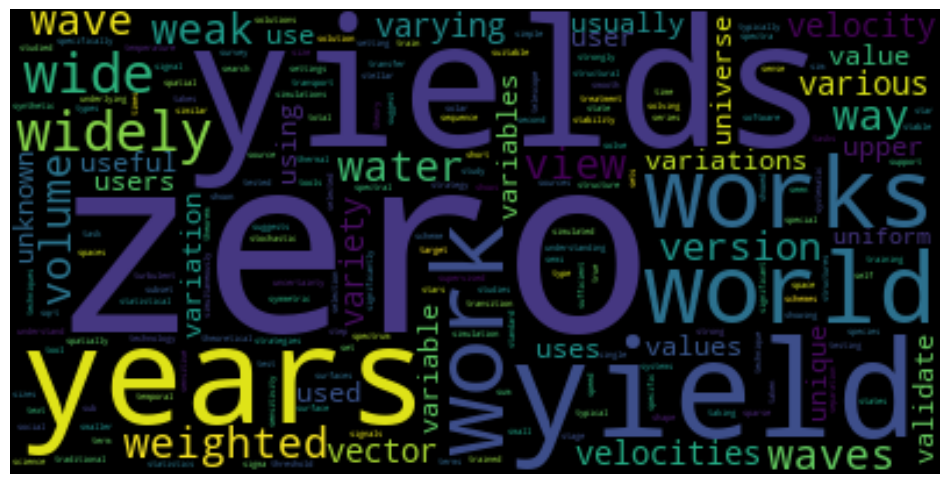

In [10]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="black")
wordcloud.generate_from_frequencies(cvec.vocabulary_)
plt.figure(figsize=(12, 12 / 1.618))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

# Dimensionality Reduction  

<Axes: xlabel='0', ylabel='1'>

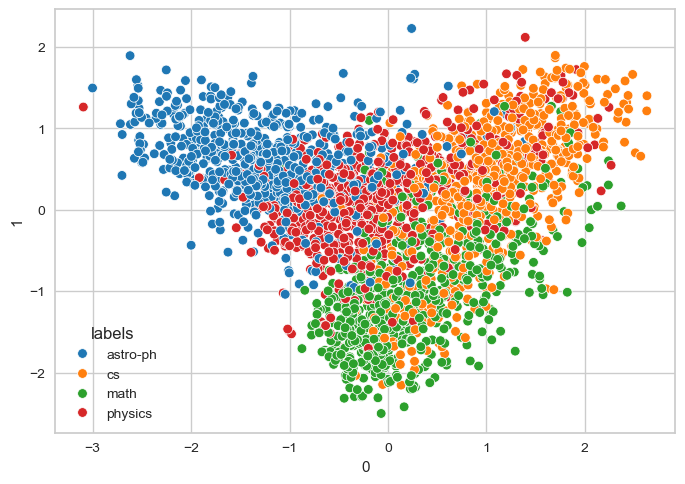

In [11]:
from sklearn.decomposition import PCA

# Will use PCA to dim redux the text data, then we will hotglue it with the labels to make a dataframe.
# Make sure you make the vectorized matrix dense for the fit_transform.
# Note the use of np.asarray, which this requires because fit transform does no like np.matrix.
pca = PCA()
text_data_as_dense_array = np.asarray(text_train_vectorized.todense())
text_data = pca.fit_transform(text_data_as_dense_array)
df_text = pd.DataFrame(text_data[:, :2])
df_labels = pd.DataFrame({"labels": labels_train})
df_train = pd.concat([df_text, df_labels], axis=1)

sns.scatterplot(x=0, y=1, hue="labels", data=df_train, palette="tab10")

# Support Vector Machine - Linear Kernel

In [39]:
from sklearn.svm import SVC
from skopt import BayesSearchCV
import pickle

param = {"C": 10 ** np.linspace(-3, 3, 101)}
linear_support_vector_classifier = SVC(kernel="linear", max_iter=25000, random_state=0)
linear_support_vector_classifier_search = BayesSearchCV(
    linear_support_vector_classifier,
    param, n_iter=15, cv=5, n_jobs=-1, refit=True, random_state=0
)
linear_support_vector_classifier_search.fit(text_train_vectorized, labels_train_encoded)

# Save
with open("linear_support_vector_classifier_search.pkl", "wb") as file:
    pickle.dump(linear_support_vector_classifier_search, file)
    
# Visualize
df_html = pd.DataFrame(linear_support_vector_classifier_search.cv_results_)
df_html = df_html.loc[:, ["params", "mean_test_score", "rank_test_score"]]
show_html(df_html.sort_values(by="rank_test_score").head().to_html())

,params,mean_test_score,rank_test_score
3,{'C': 0.006918309709189363},0.780714,1
4,{'C': 0.023988329190194897},0.776071,2
8,{'C': 0.0034673685045253167},0.772500,3
1,{'C': 0.03630780547701014},0.765000,4
9,{'C': 0.16595869074375597},0.727500,5


## Classification Report

In [40]:
from sklearn.metrics import classification_report

labels_predicted = linear_support_vector_classifier_search.predict(text_test_vectorized)
print(classification_report(labels_test_encoded, labels_predicted, target_names=categorical_labels))

              precision    recall  f1-score   support

    astro-ph       0.93      0.85      0.89       300
          cs       0.75      0.73      0.74       300
        math       0.73      0.80      0.77       300
     physics       0.73      0.74      0.74       300

    accuracy                           0.78      1200
   macro avg       0.79      0.78      0.78      1200
weighted avg       0.79      0.78      0.78      1200



## Confusion Matrix

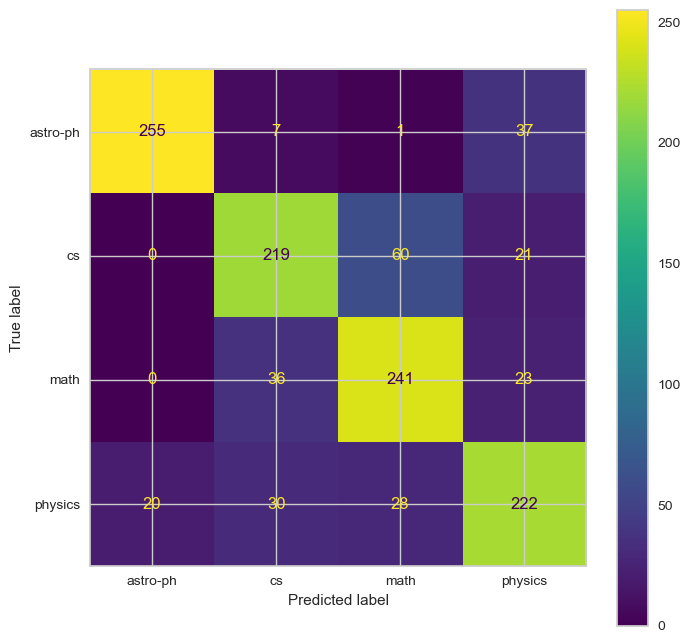

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay  

plt.figure(figsize=(8, 8));

ConfusionMatrixDisplay.from_estimator(
    linear_support_vector_classifier_search, 
    text_test_vectorized, labels_test_encoded, display_labels=categorical_labels,
    ax=plt.subplot()
)


## ROC Curve

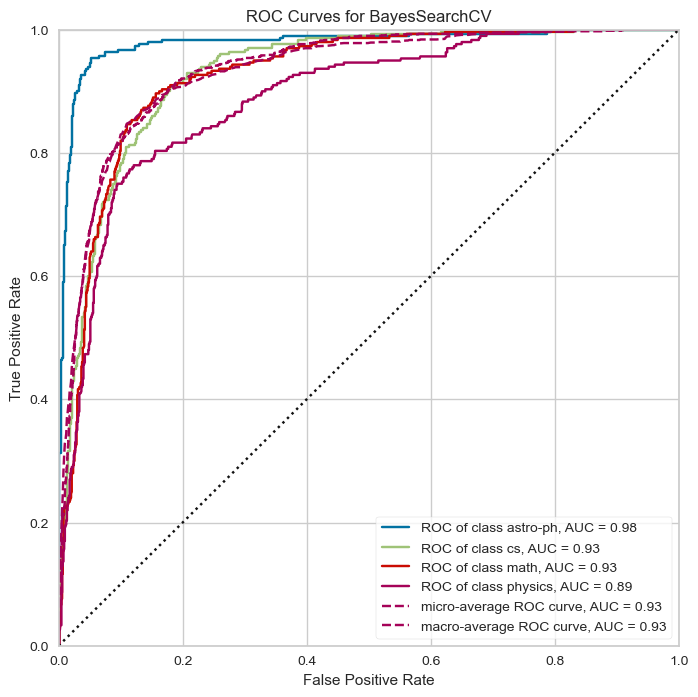

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for BayesSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=array(['astro-ph', 'cs', 'math', 'physics'], dtype='<U8'),
       estimator=BayesSearchCV(cv=5,
                               estimator=SVC(kernel='linear', max_iter=25000,
                                             random_state=0),
                               n_iter=15, n_jobs=-1, random_state=0,
                               search_spaces={'C': array([1.00000000e-03, 1.14815...
       3.63078055e+01, 4.16869383e+01, 4.78630092e+01, 5.49540874e+01,
       6.30957344e+01, 7.24435960e+01, 8.31763771e+01, 9.54992586e+01,
       1.09647820e+02, 1.25892541e+02, 1.44543977e+02, 1.65958691e+02,
       1.90546072e+02, 2.18776162e+02, 2.51188643e+02, 2.88403150e+02,
       3.31131121e+02, 3.80189396e+02, 4.36515832e+02, 5.01187234e+02,
       5.75439937e+02, 6.60693448e+02, 7.58577575e+02, 8.70963590e+02,
       1.00000000e+03])}))

In [42]:
from yellowbrick.classifier.rocauc import roc_auc

plt.figure(figsize=(8, 8));

roc_auc(
    linear_support_vector_classifier_search, 
    text_train_vectorized, labels_train_encoded,
    text_test_vectorized, labels_test_encoded,
    classes=categorical_labels
)

# Support Vectore Machines - Polynomial Kernel

In [ ]:
params = {
    "C": 10 ** np.linspace(-3, 3, 101), 
    "degree": [2, 3]
}
polynomial_support_vector_classifier = SVC(
    kernel="poly", max_iter=25000, random_state=0
)
polynomial_support_vector_classifier_search = BayesSearchCV(
    polynomial_support_vector_classifier, params, 
    n_iter=15, cv=5, n_jobs=-1, refit=True, random_state=0
)
polynomial_support_vector_classifier_search.fit(text_train_vectorized, labels_train_encoded)

with open("polynomial_support_vector_classifier_search.pkl", "wb") as file:
    pickle.dump(polynomial_support_vector_classifier_search, file)
    print(f"File saved as: polynomial_support_vector_classifier_search.pkl")

# Visualize
df_html = pd.DataFrame(polynomial_support_vector_classifier_search.cv_results_)
df_html = df_html.loc[:, ["params", "mean_test_score", "rank_test_score"]]
show_html(df_html.sort_values(by="rank_test_score").head().to_html())

,params,mean_test_score,rank_test_score
2,"{'C': 1.513561248436207, 'degree': 2}",0.785714,1
12,"{'C': 1.9952623149688788, 'degree': 2}",0.785000,2
13,"{'C': 2.6302679918953813, 'degree': 2}",0.784643,3
14,"{'C': 0.8709635899560805, 'degree': 2}",0.783571,4
10,"{'C': 380.1893963205613, 'degree': 2}",0.781429,5


## Classification Report

In [153]:
from sklearn.metrics import classification_report

labels_predicted = polynomial_support_vector_classifier_search.predict(text_test_vectorized)
classification_report_ = classification_report(labels_test_encoded, labels_predicted, target_names=categorical_labels)
print(classification_report_)

              precision    recall  f1-score   support

    astro-ph       0.91      0.86      0.88       300
          cs       0.76      0.73      0.74       300
        math       0.71      0.80      0.75       300
     physics       0.73      0.71      0.72       300

    accuracy                           0.77      1200
   macro avg       0.78      0.77      0.78      1200
weighted avg       0.78      0.77      0.78      1200



## Confusion Matrix

<Figure size 800x800 with 0 Axes>

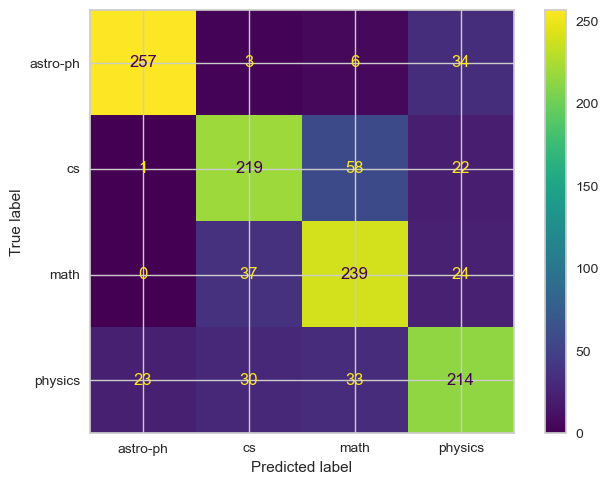

In [157]:
plt.figure(figsize=(8, 8));

ConfusionMatrixDisplay.from_estimator(
    polynomial_support_vector_classifier_search, text_test_vectorized, labels_test_encoded,
    display_labels=categorical_labels
)

## Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

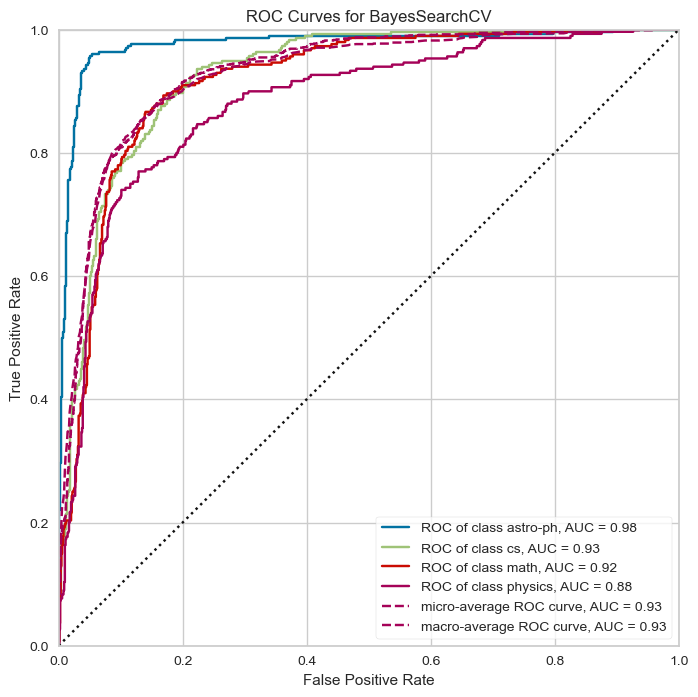

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for BayesSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=array(['astro-ph', 'cs', 'math', 'physics'], dtype='<U8'),
       estimator=BayesSearchCV(cv=5,
                               estimator=SVC(kernel='poly', max_iter=25000,
                                             random_state=0),
                               n_iter=15, n_jobs=-1, random_state=0,
                               search_spaces={'C': array([1.00000000e-03, 1.1481536...
       3.63078055e+01, 4.16869383e+01, 4.78630092e+01, 5.49540874e+01,
       6.30957344e+01, 7.24435960e+01, 8.31763771e+01, 9.54992586e+01,
       1.09647820e+02, 1.25892541e+02, 1.44543977e+02, 1.65958691e+02,
       1.90546072e+02, 2.18776162e+02, 2.51188643e+02, 2.88403150e+02,
       3.31131121e+02, 3.80189396e+02, 4.36515832e+02, 5.01187234e+02,
       5.75439937e+02, 6.60693448e+02, 7.58577575e+02, 8.70963590e+02,
       1.00000000e+03]),
                                              'degree': [2, 3]}))

In [171]:
plt.figure(figsize=(8, 8))
roc_auc(
    polynomial_support_vector_classifier_search, 
    text_train_vectorized, labels_train_encoded,text_test_vectorized, labels_test_encoded, 
    classes=categorical_labels
)

# Support Vector Machines - Radial Basis Functions

In [ ]:
## Scale means we use the variance of the data in the calculation, while auto means we only
## Use the number of features. See the notes for a deeper definition.
params = {"C": 10 ** np.linspace(-3, 3, 101), "gamma": ["scale", "auto"]}
radial_basis_support_vector_classifier = SVC(kernel="rbf", max_iter=25000, random_state=0)
radial_basis_support_vector_classifier_search = BayesSearchCV(
    radial_basis_support_vector_classifier, params, n_iter=15, cv=5, n_jobs=-1, refit=True, random_state=0 
)
radial_basis_support_vector_classifier_search.fit(text_train_vectorized, labels_train_encoded)
with open("radial_basis_support_vector_classifier_search.pkl", "wb") as file:
    pickle.dump(radial_basis_support_vector_classifier_search, file)
    print("File saved as: radial_basis_support_vector_classifier_search.pkl")

File saved as: radial_basis_support_vector_classifier_search.pkl


In [ ]:
# Visualize:
with open("radial_basis_support_vector_classifier_search.pkl", "rb") as file:
    rbfsvc_search = pickle.load(file)
df_html = pd.DataFrame(rbfsvc_search.cv_results_).loc[:, ["params", "mean_test_score", "rank_test_score"]]
show_html(df_html.sort_values(by = "rank_test_score").head().to_html())

,params,mean_test_score,rank_test_score
2,"{'C': 1.513561248436207, 'gamma': 'scale'}",0.791429,1
11,"{'C': 380.1893963205613, 'gamma': 'scale'}",0.789286,2
13,"{'C': 144.5439770745928, 'gamma': 'scale'}",0.789286,2
10,"{'C': 1.1481536214968828, 'gamma': 'scale'}",0.788929,4
0,"{'C': 1.513561248436207, 'gamma': 'auto'}",0.769286,5


## Classification Report

In [ ]:
labels_predicted = radial_basis_support_vector_classifier_search.predict(text_test_vectorized)
classification_report_ = classification_report(labels_test_encoded, labels_predicted, target_names=categorical_labels)
print(classification_report_)

              precision    recall  f1-score   support

    astro-ph       0.91      0.88      0.90       300
          cs       0.76      0.76      0.76       300
        math       0.74      0.78      0.76       300
     physics       0.75      0.73      0.74       300

    accuracy                           0.79      1200
   macro avg       0.79      0.79      0.79      1200
weighted avg       0.79      0.79      0.79      1200



## Confusion Matrix

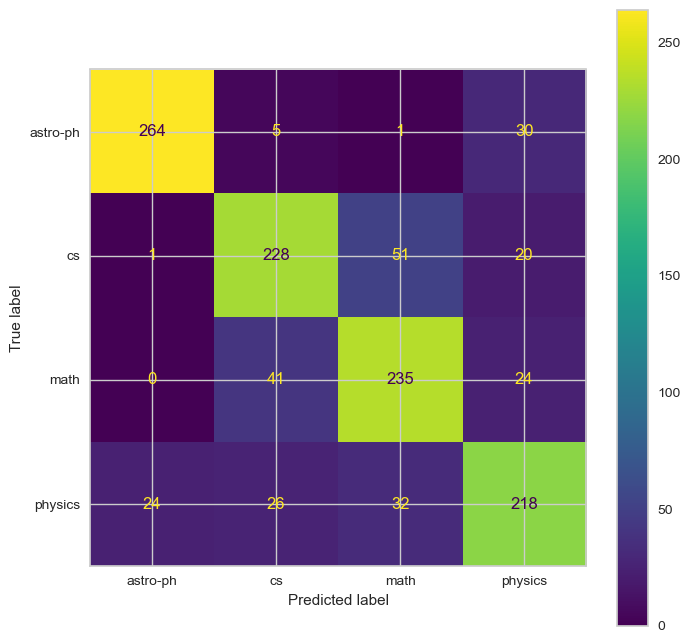

In [35]:
plt.figure(figsize=(8, 8))
ConfusionMatrixDisplay.from_estimator(
    radial_basis_support_vector_classifier_search, 
    text_test_vectorized, labels_test_encoded, 
    display_labels=categorical_labels, ax=plt.subplot()
)

## Receiver Operating Characteristic (ROC) Curve  

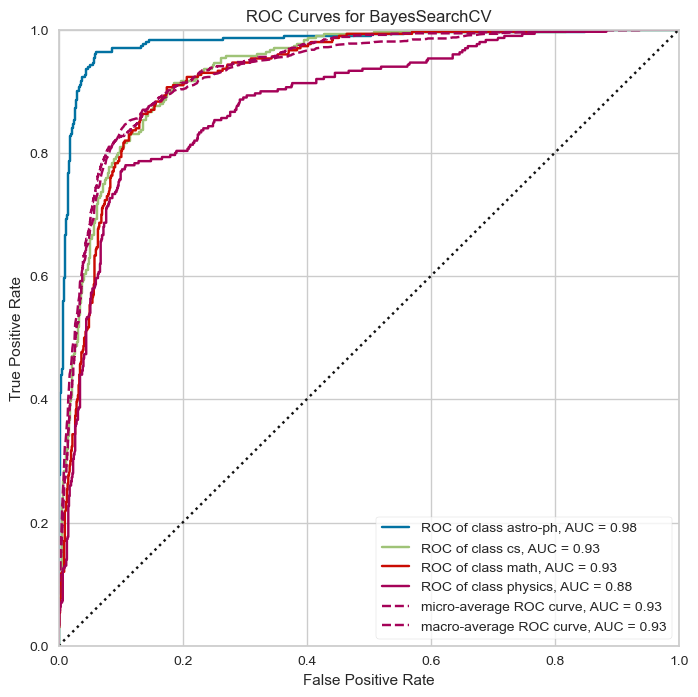

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for BayesSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=array(['astro-ph', 'cs', 'math', 'physics'], dtype='<U8'),
       estimator=BayesSearchCV(cv=5,
                               estimator=SVC(max_iter=25000, random_state=0),
                               n_iter=15, n_jobs=-1, random_state=0,
                               search_spaces={'C': array([1.00000000e-03, 1.14815362e-03, 1.318256...
       3.63078055e+01, 4.16869383e+01, 4.78630092e+01, 5.49540874e+01,
       6.30957344e+01, 7.24435960e+01, 8.31763771e+01, 9.54992586e+01,
       1.09647820e+02, 1.25892541e+02, 1.44543977e+02, 1.65958691e+02,
       1.90546072e+02, 2.18776162e+02, 2.51188643e+02, 2.88403150e+02,
       3.31131121e+02, 3.80189396e+02, 4.36515832e+02, 5.01187234e+02,
       5.75439937e+02, 6.60693448e+02, 7.58577575e+02, 8.70963590e+02,
       1.00000000e+03]),
                                              'gamma': ['scale', 'auto']}))

In [38]:
plt.figure(figsize=(8, 8))

roc_auc(
    radial_basis_support_vector_classifier_search,
    text_train_vectorized, labels_train_encoded,
    text_test_vectorized, labels_test_encoded,
    classes=categorical_labels, ax=plt.subplot()
)

In [132]:
###<< END don't forget to add all the "stuff" to your codesnip library. 